In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [135]:
#load data
df = pd.read_csv("train.csv")
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [136]:
#drop unwanted attribute
df.dropna(inplace=True)

In [137]:
#EDA 
print("--------------------------------------------------------------")
print("Information of dataset:\n", df.info())
print("--------------------------------------------------------------")
print("Description of dataset:\n", df.describe)
print("--------------------------------------------------------------")
print("Size of dataset:", df.size)
print("--------------------------------------------------------------")

--------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10189 non-null  int64  
 1   Time_spent_Alone           10189 non-null  float64
 2   Stage_fear                 10189 non-null  object 
 3   Social_event_attendance    10189 non-null  float64
 4   Going_outside              10189 non-null  float64
 5   Drained_after_socializing  10189 non-null  object 
 6   Friends_circle_size        10189 non-null  float64
 7   Post_frequency             10189 non-null  float64
 8   Personality                10189 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 796.0+ KB
Information of dataset:
 None
--------------------------------------------------------------
Description of dataset:
 <bound method NDFrame.describe of   

In [138]:
#Time spent
time_spent_alone = df.groupby('Personality')['Time_spent_Alone'].value_counts().reset_index()
time_spent_alone.head()

,Personality,Time_spent_Alone,count
0,Extrovert,2.0,1973
1,Extrovert,0.0,1948
2,Extrovert,1.0,1921
3,Extrovert,3.0,1917
4,Extrovert,4.0,467


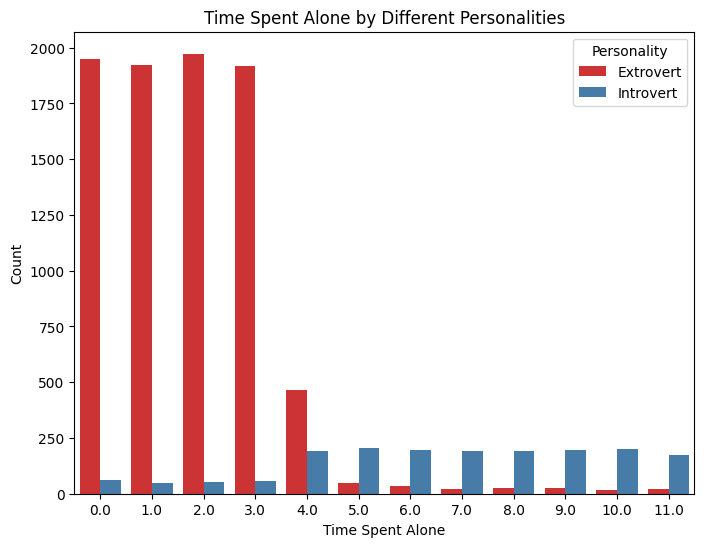

In [139]:
#time spent vs personality plot
plt.figure(figsize=(8, 6))
sns.barplot(data = time_spent_alone, x = 'Time_spent_Alone', y = 'count',hue = 'Personality', palette='Set1')
plt.xlabel("Time Spent Alone")
plt.ylabel("Count")
plt.title("Time Spent Alone by Different Personalities")
plt.show()

In [140]:
#Social event attendance 
social_event_count = df.groupby('Personality')['Social_event_attendance'].value_counts().reset_index()
social_event_count.head()

,Personality,Social_event_attendance,count
0,Extrovert,8.0,1255
1,Extrovert,7.0,1247
2,Extrovert,9.0,1245
3,Extrovert,4.0,1233
4,Extrovert,6.0,1232


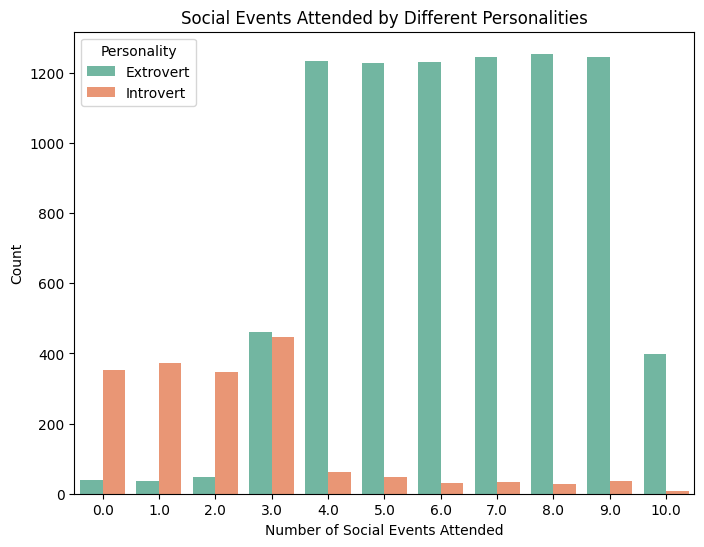

In [141]:
#Social event attendance plot
plt.figure(figsize=(8,6))
sns.barplot(data = social_event_count, x = 'Social_event_attendance', y = 'count',hue = 'Personality', palette= 'Set2')
plt.title("Social Events Attended by Different Personalities")
plt.xlabel("Number of Social Events Attended")
plt.ylabel("Count")
plt.show()

In [142]:
#stage fear and personality
stage_fear = df.groupby('Personality')['Stage_fear'].value_counts().reset_index()
stage_fear

,Personality,Stage_fear,count
0,Extrovert,No,8271
1,Extrovert,Yes,151
2,Introvert,Yes,1550
3,Introvert,No,217


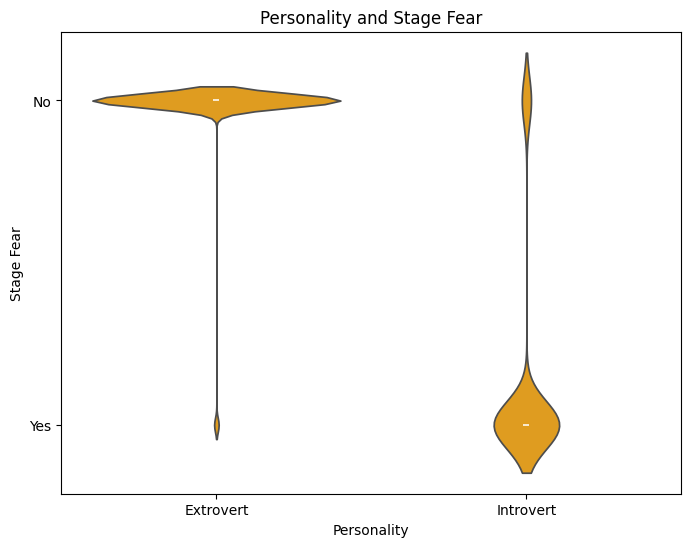

In [143]:
#stage fear and personality plot
plt.figure(figsize=(8,6))
sns.violinplot(data = df, x= 'Personality', y= 'Stage_fear', color='orange')
plt.title("Personality and Stage Fear")
plt.xlabel("Personality")
plt.ylabel("Stage Fear")
plt.show()

In [144]:
#DRained after socializing
drained_after_socializing = df.groupby('Personality')['Drained_after_socializing'].value_counts().reset_index()
drained_after_socializing

,Personality,Drained_after_socializing,count
0,Extrovert,No,8268
1,Extrovert,Yes,154
2,Introvert,Yes,1548
3,Introvert,No,219


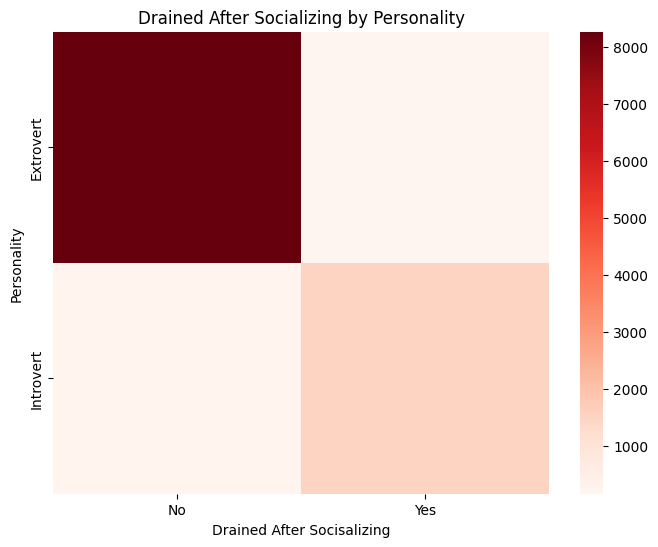

In [175]:
#drained after socializing
plt.figure(figsize=(8,6))
ct = pd.pivot_table(drained_after_socializing, values='count', index='Personality', columns='Drained_after_socializing')
sns.heatmap(ct, annot=False, cmap='Reds')
plt.xlabel("Drained After Socisalizing")
plt.title("Drained After Socializing by Personality")
plt.show()


In [146]:
#Going outside 
going_outside = df.groupby('Personality')['Going_outside'].value_counts().reset_index()
going_outside

,Personality,Going_outside,count
0,Extrovert,6.0,1741
1,Extrovert,4.0,1689
2,Extrovert,5.0,1684
3,Extrovert,7.0,1604
4,Extrovert,3.0,1575
5,Extrovert,2.0,60
6,Extrovert,0.0,38
7,Extrovert,1.0,31
8,Introvert,3.0,410
9,Introvert,0.0,398


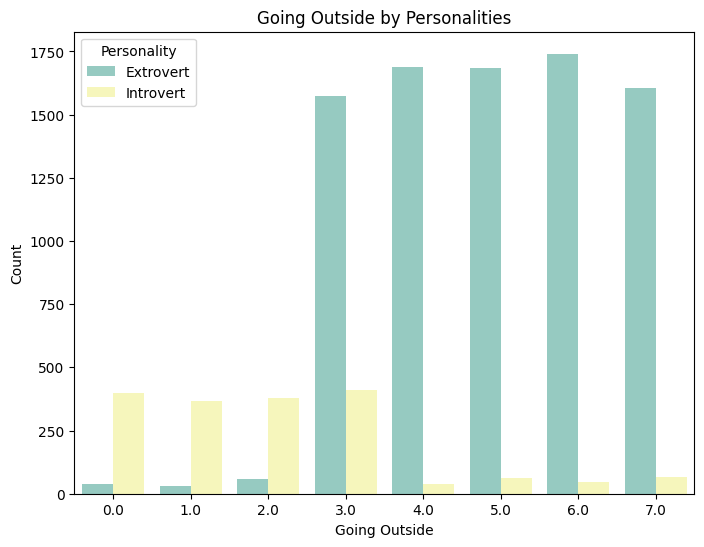

In [147]:
#personality v's going outside plot
plt.figure(figsize=(8,6))
sns.barplot(data = going_outside, x = 'Going_outside', y = 'count',hue = 'Personality', palette= 'Set3')
plt.title("Going Outside by Personalities")
plt.xlabel("Going Outside")
plt.ylabel("Count")
plt.show()

In [148]:
#friend circle size
friend_circle = df.groupby('Personality')['Friends_circle_size'].value_counts().reset_index()
friend_circle.head()

,Personality,Friends_circle_size,count
0,Extrovert,10.0,741
1,Extrovert,12.0,740
2,Extrovert,11.0,733
3,Extrovert,8.0,729
4,Extrovert,13.0,724


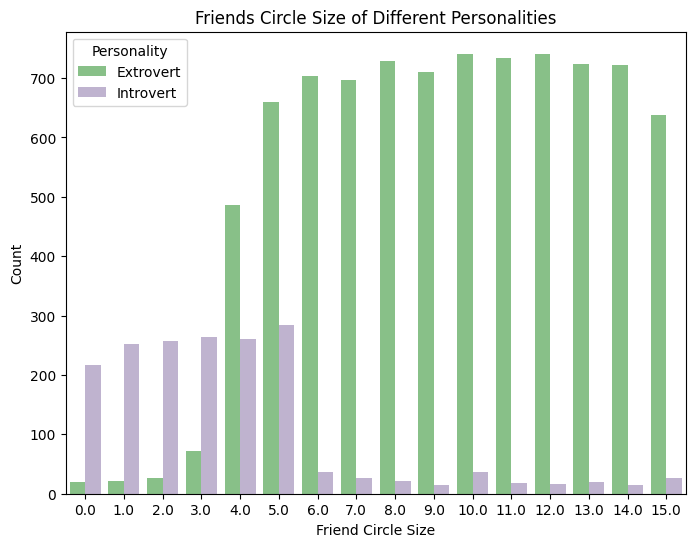

In [149]:
#personality vs friend circle size plot
plt.figure(figsize=(8,6))
sns.barplot(data = friend_circle, x = 'Friends_circle_size', y = 'count',hue = 'Personality', palette= 'Accent')
plt.title("Friends Circle Size of Different Personalities")
plt.xlabel("Friend Circle Size")
plt.ylabel("Count")
plt.show()

In [150]:
#post frequency of different personalities
post_frequency = df.groupby('Personality')['Post_frequency'].value_counts().reset_index()
post_frequency.head()

,Personality,Post_frequency,count
0,Extrovert,7.0,1134
1,Extrovert,3.0,1110
2,Extrovert,9.0,1107
3,Extrovert,6.0,1106
4,Extrovert,8.0,1106


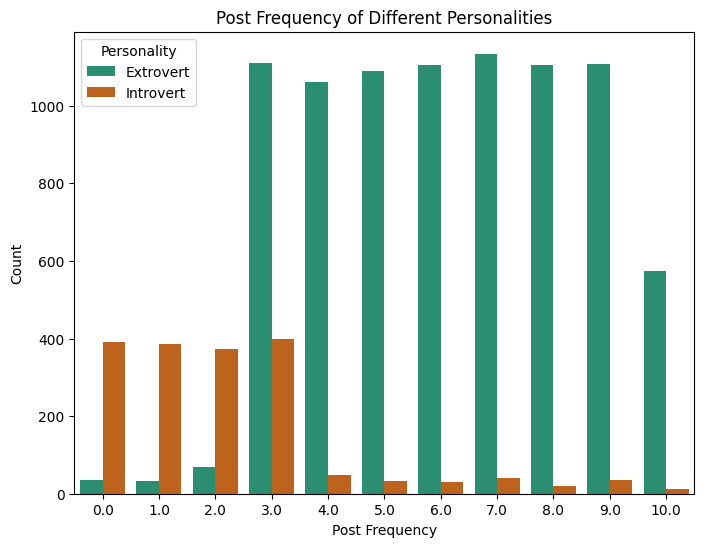

In [151]:
#personality vs post frequency plot
plt.figure(figsize=(8,6))
sns.barplot(data = post_frequency, x = 'Post_frequency', y = 'count',hue = 'Personality', palette= 'Dark2')
plt.title("Post Frequency of Different Personalities")
plt.xlabel("Post Frequency")
plt.ylabel("Count")
plt.show()

In [152]:
#features and targets
features = df.drop(columns=['id', 'Personality'], axis = 1)
target = df['Personality']

In [153]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [154]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical: ['Stage_fear', 'Drained_after_socializing']


In [155]:
#transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [156]:
#X transforms
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Target transform
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [157]:
#model svc
modelsvc = SVC(C= 20, kernel='rbf')
modelsvc.fit(X_train_transformed, y_train)

SVC(C=20)

In [158]:
#predictions and evaluation
predsvc = modelsvc.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, predsvc))
print("Precision:", precision_score(y_test, predsvc))
print("Recall:", recall_score(y_test, predsvc))

Accuracy: 0.9602551521099116
Precision: 0.8929663608562691
Recall: 0.863905325443787


[]

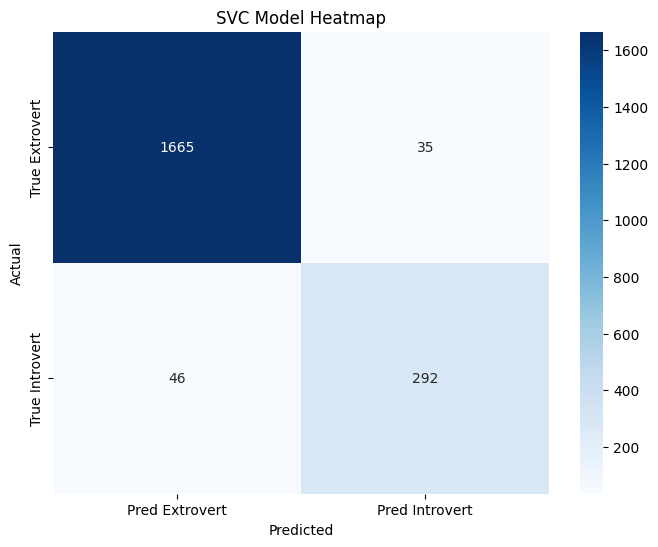

In [159]:
#Confusion matrix
cmsvc = confusion_matrix(y_test, predsvc)

plt.figure(figsize=(8,6))
sns.heatmap(data = cmsvc, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Extrovert', 'Pred Introvert'], yticklabels=['True Extrovert', 'True Introvert'])
plt.title("SVC Model Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [160]:
#Gradient Boosting Model
modelgb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, max_features='log2')
modelgb.fit(X_train_transformed, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           n_estimators=250)

In [161]:
#predictions and evaluation on Gardient Booster model
predgb = modelgb.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, predgb))
print("Precision:", precision_score(y_test, predgb))
print("Recall:", recall_score(y_test, predgb))

Accuracy: 0.9587831207065751
Precision: 0.8871951219512195
Recall: 0.8609467455621301


[]

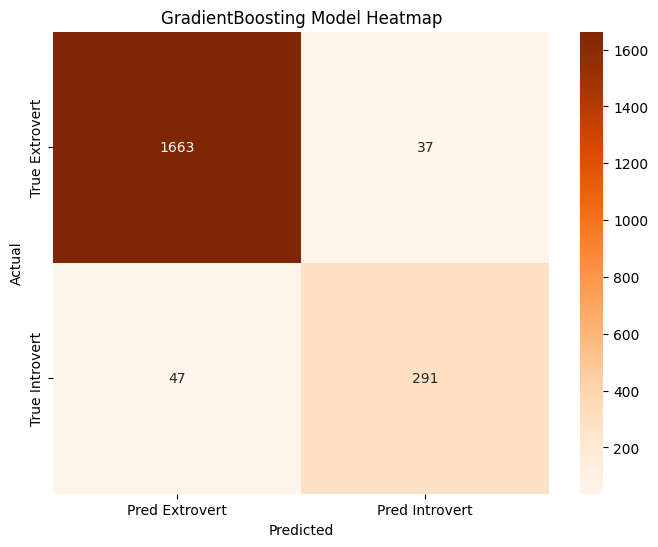

In [178]:
#Confusion matrix
cmgb = confusion_matrix(y_test, predgb)

plt.figure(figsize=(8,6))
sns.heatmap(data = cmgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Pred Extrovert', 'Pred Introvert'], yticklabels=['True Extrovert', 'True Introvert'])
plt.title("GradientBoosting Model Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [163]:
#Decision Tree model
modeldt = DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='best', criterion='gini')
modeldt.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

In [164]:
#prediction using Decision tree
preddt = modeldt.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, preddt))
print("Precision:", precision_score(y_test, preddt))
print("Recall:", recall_score(y_test, preddt))

Accuracy: 0.9582924435721295
Precision: 0.8844984802431611
Recall: 0.8609467455621301


[]

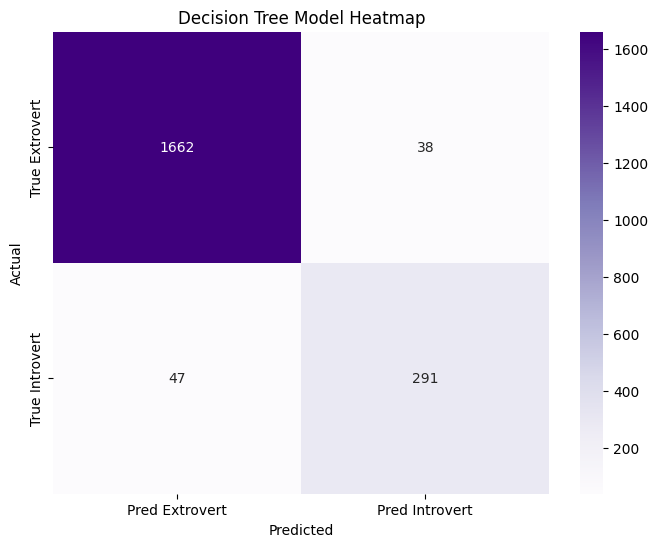

In [177]:
#Confusion matrix
cmdt = confusion_matrix(y_test, preddt)

plt.figure(figsize=(8,6))
sns.heatmap(data = cmdt, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred Extrovert', 'Pred Introvert'], yticklabels=['True Extrovert', 'True Introvert'])
plt.title("Decision Tree Model Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [166]:
#test dataset
df_test = pd.read_csv("test.csv")
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [167]:
#preprocessing Test data
df_test_processed = df_test.drop(columns = ['id'], axis = 1)

In [168]:
#transform test data
test_data = preprocessor.transform(df_test_processed)

In [169]:
#make prediction on test data
prediction = modeldt.predict(test_data)

In [170]:
#inverse transform test data
decoded_preds = encoder.inverse_transform(prediction)
decoded_preds

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [171]:
#make the final Submission df
pred_df = pd.DataFrame({
    'id': df_test['id'],
    'Personality': decoded_preds
})
pred_df.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [172]:
pred_df.to_csv("Submission4.csv", index=False)

In [173]:
submission = pd.read_csv("Submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6175 non-null   int64 
 1   Personality  6175 non-null   object
dtypes: int64(1), object(1)
memory usage: 96.6+ KB
